# Brute Force Needs Work

### Goal: pick 4 USA men's Gymnasts. Gymnasts cannot compete on the same appartaus more than once. And each apparatus needs to be competed on 3 times each, then get the largest sum of the top 3 out of 4 scores on each of the 6 apparatus. 

# Mens Performance of Models for 2024 Olympics




# Tabu Search

### IAA

Selected Athletes:
['khoi young' 'asher hong' 'fred richard' 'yul moldauer']
Total Score:
260.57900000000006

### Apparatus
Selected Athletes:
['frederick nathaniel richard' 'paul juda' 'khoi young' 'brody malone']
Total Score:
253.19598690476192

---

# Hyper-Heuristics:

### IAA
Best Selection: ['joshua karnes' 'ian lasic-ellis' 'asher hong' 'yul moldauer']
Best Score: 254.94

### Apparatus
Best Selection: ['khoi young' 'paul juda' 'brody malone' 'fuzzy benas']
Best Score: 250.58868690476191

---


#  Variable Neighborhood Search (VNS):

## IAA

Selected Athletes: ['fuzzy benas', 'yul moldauer', 'asher hong', 'fred richard']
Total Score: 257.34200000000004


## Apparatus
Selected Athletes: ['shane wiskus', 'khoi young', 'donnell whittenburg', 'brody malone']
Total Score: 251.11566666666667



---

# MILP

### Apparatus
not returning 4 athletes

### IAA
not returning 4 athletes





---

## Mens Performance of Models for 2020 Olympics

Tabu Search is close to the exact team for olympics with the exception of marvin kimble, who retired a month prior to the olympic trials.

- Tabu Search
    - Apparatus
    - Selected Athletes: ['yul moldauer' 'marvin kimble' 'samuel mikulak' 'shane wiskus'] 
    - Total Score: 258.205



# VNS

### Apparatus
Selected Athletes: ['colin van wicklen', 'yul moldauer', 'marvin kimble', 'samuel mikulak']
Total Score: 257.289
Best Seed: 5033

### iaa
Selected Athletes: ['akash modi', 'samuel mikulak', 'yul moldauer', 'allan bower']
Total Score: 256.536
Best Seed: 8


# Hyper-Heuristics

#### Apparatus
Best Selection: ['yul moldauer' 'akash modi' 'colin van wicklen' 'alec yoder']
Best Score: 251.773


#### IAA
Best Selection: ['allan bower' 'akash modi' 'yul moldauer' 'samuel mikulak']
Best Score: 255.00300000000001

# Tabu Search

#### Apparatus
Selected Athletes:
['yul moldauer' 'marvin kimble' 'samuel mikulak' 'shane wiskus']
Total Score:
258.205

#### IAA
Selected Athletes:
['allan bower' 'akash modi' 'yul moldauer' 'samuel mikulak']
Total Score:
256.536





In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

# Updated data without brute-force search
data = {
    'Algorithm': ['Tabu Search', 'Tabu Search', 'Hyper-Heuristics', 'Hyper-Heuristics', 'Variable Neighborhood Search (VNS)', 'Variable Neighborhood Search (VNS)'],
    'IAA/Apparatus': ['IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus'],
    'Selected Athletes': [
        ['khoi young', 'asher hong', 'fred richard', 'yul moldauer'],
        ['fred richard', 'paul juda', 'khoi young', 'brody malone'],
        ['joshua karnes', 'ian lasic-ellis', 'asher hong', 'yul moldauer'],
        ['khoi young', 'paul juda', 'brody malone', 'fuzzy benas'],
        ['fuzzy benas', 'yul moldauer', 'asher hong', 'fred richard'],
        ['shane wiskus', 'khoi young', 'donnell whittenburg', 'brody malone']
    ],
    'Total Score': [260.57900000000006, 253.19598690476192, 254.94, 250.58868690476191, 257.34200000000004, 251.11566666666667]
}

# Create DataFrame
result_df = pd.DataFrame(data)

# Add columns for each athlete
athletes = list(set(athlete for athletes_list in result_df['Selected Athletes'] for athlete in athletes_list))

for athlete in athletes:
    result_df[athlete] = result_df['Selected Athletes'].apply(lambda x: 1 if athlete in x else 0)

# Calculate the sum for each athlete column
athlete_sums = result_df.groupby('Algorithm')[athletes].sum()



In [3]:
# Your Series
athlete_counts = pd.Series({
    'joshua karnes': 1,
    'fred  richard': 3,
    'fuzzy benas': 1,
    'khoi young': 6,
    'paul juda': 4,
    'aidan cuy': 1,
    'vitaliy guimaraes': 1,
    'yul moldauer': 5,
    'brody malone': 2,
    'colt walker': 2,
    'curran phillips': 1,
    'ian lasic-ellis': 1,
    'asher hong': 4
})

# Convert to DataFrame
df = athlete_counts.reset_index()
df.columns = ['Athlete', 'Count']


In [4]:
df_sorted = df.sort_values(by='Count', ascending=False)

In [5]:
df = result_df[['Algorithm', 'IAA/Apparatus', 'Selected Athletes', 'Total Score']]

In [6]:
column_order = ['Algorithm', 'IAA/Apparatus', 'Total Score', 'Selected Athletes']

# Reorder the columns in the DataFrame
df = df[column_order]


In [7]:
df

,Algorithm,IAA/Apparatus,Total Score,Selected Athletes
0,Tabu Search,IAA,260.579000,"[khoi young, asher hong, fred richard, yul mol..."
1,Tabu Search,Apparatus,253.195987,"[fred richard, paul juda, khoi young, brody ma..."
2,Hyper-Heuristics,IAA,254.940000,"[joshua karnes, ian lasic-ellis, asher hong, y..."
3,Hyper-Heuristics,Apparatus,250.588687,"[khoi young, paul juda, brody malone, fuzzy be..."
4,Variable Neighborhood Search (VNS),IAA,257.342000,"[fuzzy benas, yul moldauer, asher hong, fred r..."
5,Variable Neighborhood Search (VNS),Apparatus,251.115667,"[shane wiskus, khoi young, donnell whittenburg..."


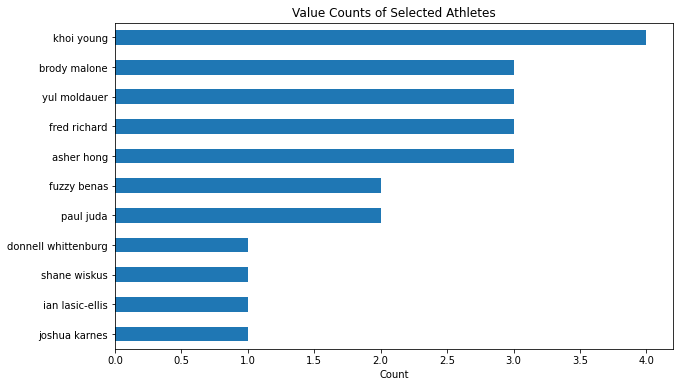

In [8]:
# Flatten the 'Selected Athletes' column
athletes_flat = [athlete for sublist in df['Selected Athletes'] for athlete in sublist]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pd.Series(athletes_flat).value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax)

ax.set_xlabel('Count')
ax.set_title('Value Counts of Selected Athletes')

plt.show()

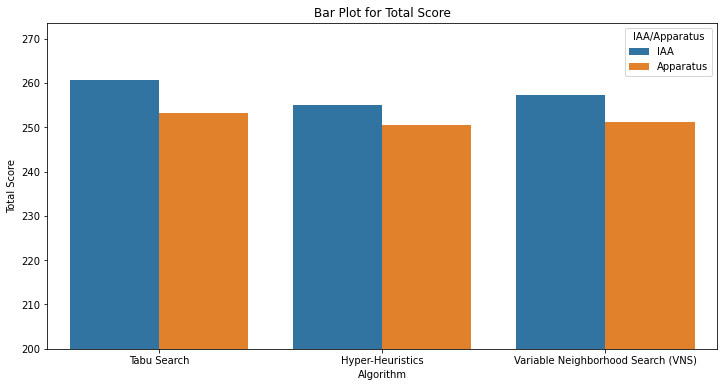

In [9]:
# Bar Plot for Total Score
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Algorithm', y='Total Score', hue='IAA/Apparatus', data=df)
plt.title('Bar Plot for Total Score')
plt.xlabel('Algorithm')
plt.ylabel('Total Score')

# Set y-axis to start at 150
ax.set_ylim(200, ax.get_ylim()[1])

plt.show()



In [10]:
# # Explode the 'Selected Athletes' column to create separate rows for each athlete
# df_exploded = df.explode('Selected Athletes')

# # Swarm Plot for Selected Athletes
# plt.figure(figsize=(12, 8))
# sns.swarmplot(x='Algorithm', y='Selected Athletes', hue='IAA/Apparatus', data=df_exploded)
# plt.title('Swarm Plot for Selected Athletes')
# plt.show()


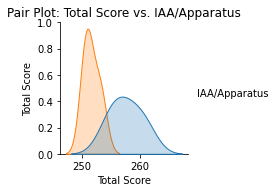

In [11]:

# Pair Plot
sns.pairplot(df, hue='IAA/Apparatus', vars=['Total Score'])
plt.title('Pair Plot: Total Score vs. IAA/Apparatus')
plt.show()



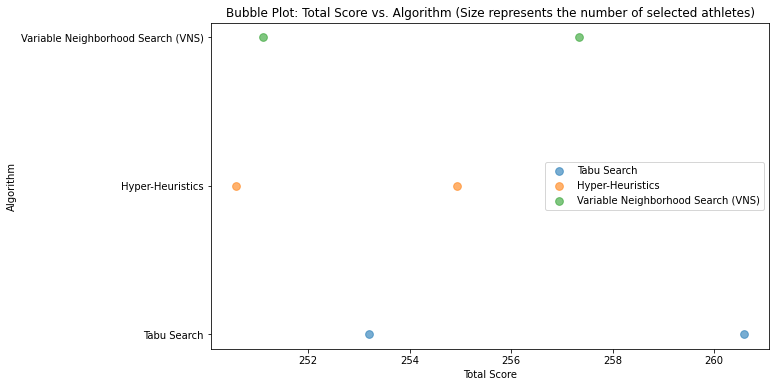

In [12]:
# Bubble Plot
plt.figure(figsize=(10, 6))
for i, algorithm in enumerate(df['Algorithm'].unique()):
    subset = df[df['Algorithm'] == algorithm]
    plt.scatter(subset['Total Score'], subset['Algorithm'], s=len(subset['Selected Athletes']) * 30, alpha=0.6, label=algorithm)

plt.xlabel('Total Score')
plt.ylabel('Algorithm')
plt.title('Bubble Plot: Total Score vs. Algorithm (Size represents the number of selected athletes)')
plt.legend()
plt.show()



In [2]:
import pandas as pd

data_gymnasts = {
    'Name': ['Hyper-Heuristics', 'Tabu Search', 'Variable Neighborhood Search (VNS)', 'Sum'],
    'khoi young': [1, 2, 1, 4],
    'asher hong': [1, 1, 1, 3],
    'brody malone': [1, 1, 1, 3],
    'yul moldauer': [1, 1, 1, 3],
    'fred richard': [0, 2, 1, 3],
    'paul juda': [1, 1, 0, 2],
    'fuzzy benas': [1, 0, 1, 2],
    'ian lasic-ellis': [1, 0, 0, 1],
    'donnell whittenburg': [0, 0, 1, 1],
    'joshua karnes': [1, 0, 0, 1],
    'shane wiskus': [0, 0, 1, 1],
}

df_gymnasts = pd.DataFrame(data_gymnasts)
df_gymnasts.set_index('Name', inplace=True)
df_gymnasts


,khoi young,asher hong,brody malone,yul moldauer,fred richard,paul juda,fuzzy benas,ian lasic-ellis,donnell whittenburg,joshua karnes,shane wiskus
Name,,,,,,,,,,,
Hyper-Heuristics,1,1,1,1,0,1,1,1,0,1,0
Tabu Search,2,1,1,1,2,1,0,0,0,0,0
Variable Neighborhood Search (VNS),1,1,1,1,1,0,1,0,1,0,1
Sum,4,3,3,3,3,2,2,1,1,1,1


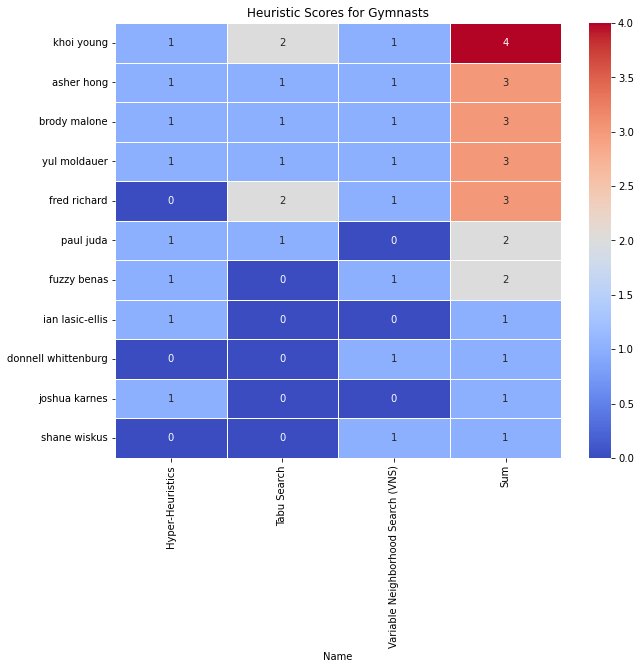

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame to have gymnasts as rows and heuristics as columns
df_gymnasts_transposed = df_gymnasts.T

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_gymnasts_transposed, annot=True, cmap='coolwarm', fmt='g', linewidths=.5)
plt.title('Heuristic Scores for Gymnasts')
plt.show()



In [10]:
 
df_gymnasts.reset_index(drop=False, inplace=True)

In [21]:
df_gymnasts=df_gymnasts.drop(columns=['Sum'])

In [22]:
df_gymnasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 4 non-null      object
 1   khoi young           4 non-null      int64 
 2   asher hong           4 non-null      int64 
 3   brody malone         4 non-null      int64 
 4   yul moldauer         4 non-null      int64 
 5   fred richard         4 non-null      int64 
 6   paul juda            4 non-null      int64 
 7   fuzzy benas          4 non-null      int64 
 8   ian lasic-ellis      4 non-null      int64 
 9   donnell whittenburg  4 non-null      int64 
 10  joshua karnes        4 non-null      int64 
 11  shane wiskus         4 non-null      int64 
dtypes: int64(11), object(1)
memory usage: 512.0+ bytes


In [44]:
df_gymnasts.T

,0,1,2,3
Name,Hyper-Heuristics,Tabu Search,Variable Neighborhood Search (VNS),Sum
khoi young,1,2,1,4
asher hong,1,1,1,3
brody malone,1,1,1,3
yul moldauer,1,1,1,3
fred richard,0,2,1,3
paul juda,1,1,0,2
fuzzy benas,1,0,1,2
ian lasic-ellis,1,0,0,1
donnell whittenburg,0,0,1,1


In [45]:
df_gymnasts=df_gymnasts.T

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_gymnasts is the provided DataFrame

# Drop the 'Sum' row
df_plot = df_gymnasts.dropna()

# Set 'Name' as index
df_plot.set_index('Name', inplace=True)

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Iterate through columns (excluding 'Name') to create a bar for each gymnast
for col in df_plot.columns[:-1]:
    plt.bar(df_plot.index, df_plot[col], label=col)

plt.xlabel('Gymnast')
plt.ylabel('Scores')
plt.title('Scores for Each Gymnast')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


KeyError: "None of ['Name'] are in the columns"

In [48]:
df_gymnasts.columns = df_gymnasts.iloc[0]

# Drop the first row
df_gymnasts = df_gymnasts[1:]

# Now, df has column names taken from the first row
df_gymnasts

Name,Hyper-Heuristics,Tabu Search,Variable Neighborhood Search (VNS),Sum
khoi young,1,2,1,4
asher hong,1,1,1,3
brody malone,1,1,1,3
yul moldauer,1,1,1,3
fred richard,0,2,1,3
paul juda,1,1,0,2
fuzzy benas,1,0,1,2
ian lasic-ellis,1,0,0,1
donnell whittenburg,0,0,1,1
joshua karnes,1,0,0,1


In [52]:
df = df_gymnasts.iloc[:11]

In [56]:
df.reset_index(drop=False, inplace=True)

In [59]:
df

Name,index,Hyper-Heuristics,Tabu Search,Variable Neighborhood Search (VNS),Sum
0,khoi young,1,2,1,4
1,asher hong,1,1,1,3
2,brody malone,1,1,1,3
3,yul moldauer,1,1,1,3
4,fred richard,0,2,1,3
5,paul juda,1,1,0,2
6,fuzzy benas,1,0,1,2
7,ian lasic-ellis,1,0,0,1
8,donnell whittenburg,0,0,1,1
9,joshua karnes,1,0,0,1


<Figure size 864x432 with 0 Axes>

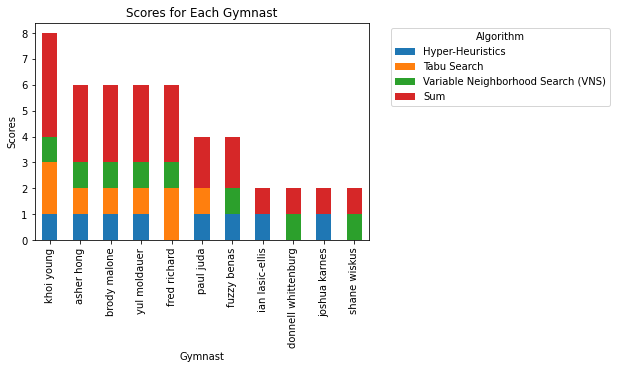

In [61]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plot the bar chart
plt.figure(figsize=(12, 6))
df.set_index('index').plot(kind='bar', stacked=True)
plt.xlabel('Gymnast')
plt.ylabel('Scores')
plt.title('Scores for Each Gymnast')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


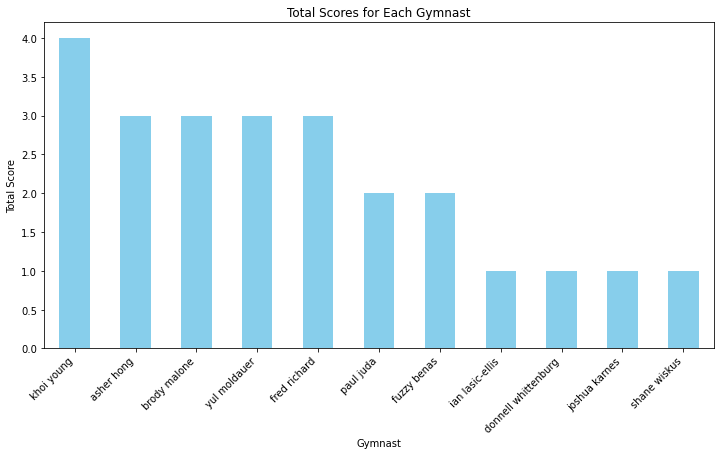

In [62]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plot the bar chart for the 'Sum' column
plt.figure(figsize=(12, 6))
df.set_index('index')['Sum'].plot(kind='bar', color='skyblue')
plt.xlabel('Gymnast')
plt.ylabel('Total Score')
plt.title('Total Scores for Each Gymnast')
plt.xticks(rotation=45, ha='right')
plt.show()
